Disciplina: Mineração de Dados

Professor: Wilson Castello Branco Neto

Aula 5 - Regressão e Classificação com Modelos Lineares

Nome: Patriki de Oliveira Góss

Exemplo/Atividade 2: Regressão linear multivariada com dados sobre seguro saúde

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Aula5Ex2Dados.csv')

Verifique se existe algum valor nulo no conjunto. Caso exista apague as linhas correspondentes.

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

não ha dados nulos no dataframe portanto nao houve necessidade de apaggar linhas que contivesse algo nulo abaixo feita a copia do data frame para não sobrepor o original

Como existem três atributos qualitativos, eles devem ser convertidas em valores quantitativos para serem incorporados ao modelo. Embora todos eles sejam nominais, não use o método get_dummies do Pandas, que é o mais indicado neste caso para gerar uma representação binária. Use o LabelEnconder para gerar um código numérico para cada valor, de forma a não gerar colunas extras visando simplificar os cálculos solicitados posteriormente.

Crie um novo dataframe denominado df2 para não sobrepor os dados originais que serão usados posteriormente. Em seguida apresente o novo dataframe.

In [4]:
from sklearn.preprocessing import LabelEncoder
df2=df.copy()
# Inicializando o LabelEncoder
le = LabelEncoder()
df2['sex'] = le.fit_transform(df2['sex'])
df2['smoker'] = le.fit_transform(df2['smoker'])
df2['region'] = le.fit_transform(df2['region'])
df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Para criar um modelo considerando todos os atributos disponíveis como variáveis independentes (exceto o atributo charges que é o que se deseja estimar) deve-se:

Armazenar os dados de todas as colunas, exceto da coluna charges, na variável X, que é uma lista de listas.
Armazenar os dados da coluna charges na variável y, que é uma lista de valores numéricos.
Usar a função train_test_split para dividir os dados em 67% para o conjunto de treinamento e 33% para o conjunto de teste.
A lista X é divida em X_train e X_test, e a lista y em y_train e y_test. O parâmetro shuffle indica que a divisão será aleatória e não sequencial e o parâmetro random_state indica o valor inicial da aleatorização (semente) para poder repetir os mesmos valores em diferentes execuções.

In [8]:
from sklearn.model_selection import train_test_split

X = df2.drop(['charges'] ,axis='columns')
y = df2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print('X - Treinamento: ')
print(X_train)
print('Y - Treinamento: ')
print(y_train)
print('X - Teste: ')
print(X_test)
print('Y -Teste: ')
print(y_test)

X - Treinamento: 
      age  sex     bmi  children  smoker  region
1046   43    0  25.080         0       0       0
682    39    1  35.300         2       1       3
1037   45    0  30.495         1       1       1
490    19    0  32.900         0       0       3
39     60    1  39.900         0       1       3
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[896 rows x 6 columns]
Y - Treinamento: 
1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 896, dtype: float64
X - Teste: 
      age  sex     bmi  children  smoker  region
764    45    0  25.175      

Cria o modelo;
Treina o modelo, a partir dos dados de treinamento;
Calcula os valores o conjunto de teste;
Apresenta os coeficientes da reta;
Calcula e apresenta o coeficiente de determinação (r2).
Calcula e apresenta o erro médio quadrado (mse).

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [  262.00518915   129.10270377   342.2658478    373.20803797
 23693.32775546  -294.4964067 ]
b =  -12368.529203578068
Coeficiente de determinação:  0.7602640802497018
Erro quadrado médio:  35132017.869487904


Calcula o custo, a partir dos coeficientes do modelo para uma pessoa com as seguintes características:

Age: 50;
Sex: 1 (Male)
BMI: 30
Children: 2
Smoker: 1 (yes)
Region: 1 (northwest)

In [10]:
seguro = 262.00518915 * 50 + 129.10270377 * 1 + 342.2658478 * 30 + 373.20803797 * 2 + 23693.32775546 * 1 + -294.4964067 * 1 + -12368.529203578068

print(f'Valor do seguro: {seguro:.2f}')

Valor do seguro: 35274.06


Calcula o valor previsto para o seguro usando o método predict do modelo criado. São passados por parâmetro os dados de duas pessoas, uma com os mesmos valores do cálculo acima e outra alterando o valor do atributo smoker de yes para no.

In [11]:
seguro = modelo.predict([[50,1,30,2,1,1],[50,1,30,2,0,1]])
print(f'Valor do seguro da pessoa 1: {seguro[0]:.2f}')
print(f'Valor do seguro da pessoa 2: {seguro[1]:.2f}')

Valor do seguro da pessoa 1: 35274.06
Valor do seguro da pessoa 2: 11580.73


c:\Users\roberto\Documents\faculdade Patriki\patriki\Patriki\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


No modelo criado, foram utilizados todos os atributos existentes no dataset. Abaixo, a relevância de cada atributo é analisada e um novo modelo criado visando reduzir a possibilidade de overfitting.

Calcule os coeficientes de correlação e gere o mapa de calor para analisar a relação entre as variáveis quantitativas.

Matriz de correlação:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


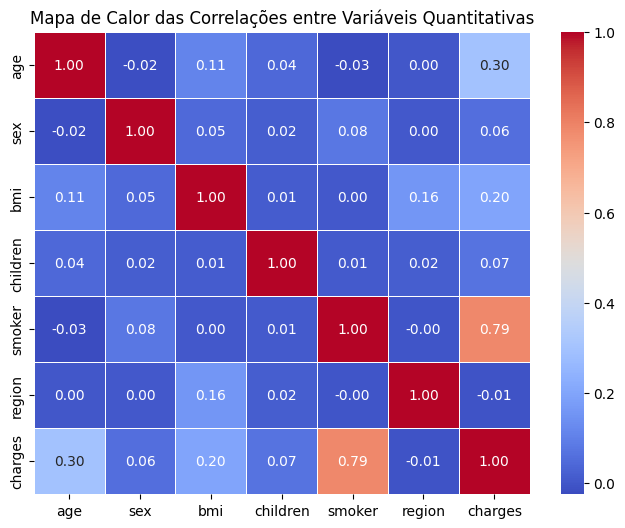

In [12]:
# Calcula a matriz de correlação
corr = df2.corr(numeric_only=True)

# Exibe a matriz de correlação
print("Matriz de correlação:")
print(corr)

# Gera o mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Variáveis Quantitativas")
plt.show()

Como a variável age foi a que apresentou a maior correlação, gere um diagrama de dispersão para compreender melhor esta relação.

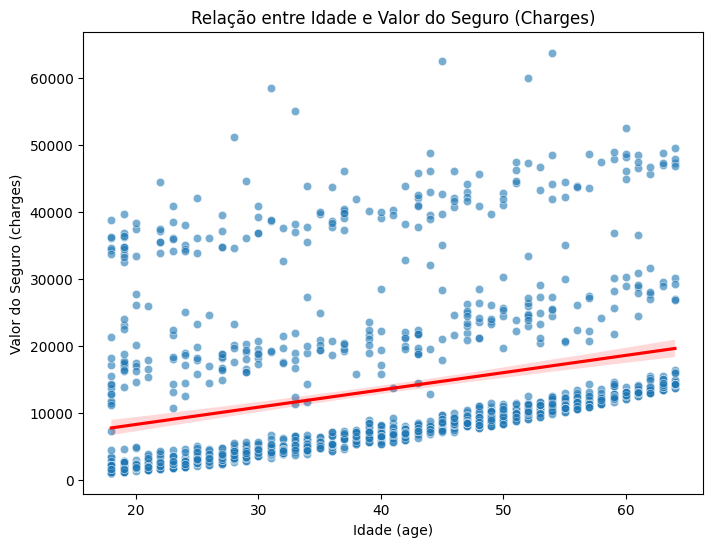

In [13]:
# Diagrama de dispersão entre idade e valor do seguro (charges)
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', data=df2, alpha=0.6)

# Linha de tendência (opcional, ajuda a visualizar a correlação)
sns.regplot(x='age', y='charges', data=df2, scatter=False, color='red')

plt.title('Relação entre Idade e Valor do Seguro (Charges)')
plt.xlabel('Idade (age)')
plt.ylabel('Valor do Seguro (charges)')
plt.show()


Analisando o diagrama de dispersão acima, é possível perceber que o atributo idade influencia no valor a ser pago, mas existem "três grupos" que devem ser influenciadas por outras variáveis.

Provavelmente, alguma variável qualitativa é responsável por esta divisão. Uma forma de identificar qual é a variável e apresentar as médias do custo do seguro saúde para cada categoria de uma variável, por meio de uma tabela ou de um gráfico de colunas ou barras, como foi feito na aula 4.

Outra possibilidade é incoporar estas variáveis no próprio diagrama de dispersão, usando cores diferentes para representar valores diferentes da variável qualitativa. Abaixo são gerados alguns outros diagramas de dispersão relacionando idade e valor pago, porém com cores para diferenciar as categorias de outras variáveis que podem estar influenciando no resultado.

Digrama de dispersão relacionando a idade, custo do seguro e a região da pessoa.



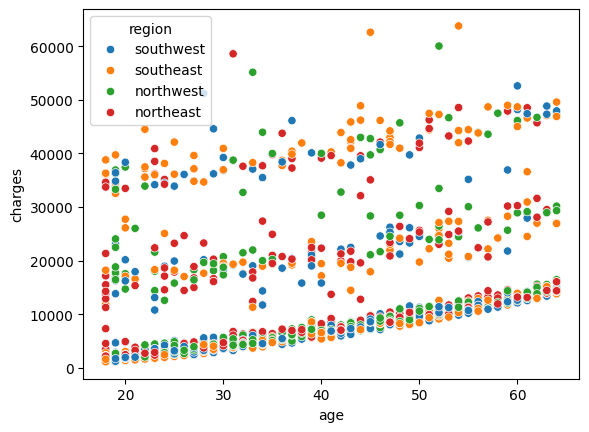

In [14]:
sns.scatterplot(x="age", y="charges", hue="region", data=df)
plt.show()

Crie um diagrama de dispersão relacionando idade, custo do seguro e o sexo.

In [ ]:
# Diagrama de dispersão entre idade e valor do seguro (charges)
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', data=df2, alpha=0.6)

# Linha de tendência (opcional, ajuda a visualizar a correlação)
sns.regplot(x='age', y='charges', data=df2, scatter=False, color='red')

plt.title('Relação entre Idade e Valor do Seguro (Charges)')
plt.xlabel('Idade (age)')
plt.ylabel('Valor do Seguro (charges)')
plt.show()

Crie um diagrama de dispersão relacionando idade, custo do seguro e se a pessoa é fumante ou não.

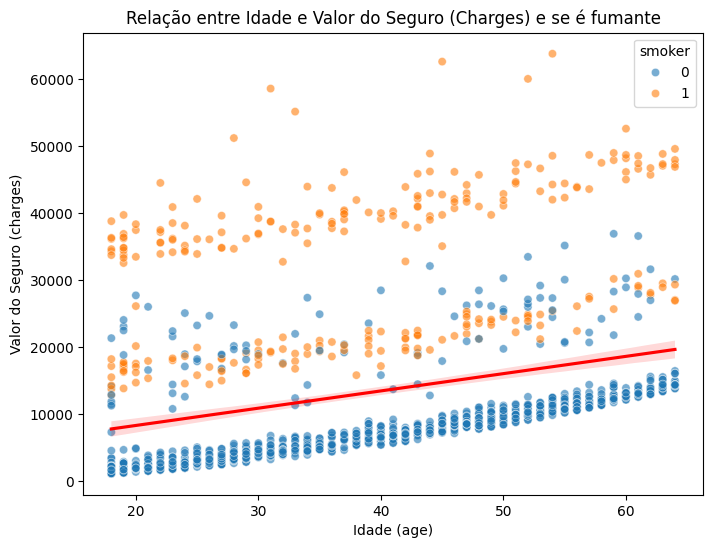

In [18]:
# Diagrama de dispersão entre idade e valor do seguro (charges)
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df2, alpha=0.6)

# Linha de tendência (opcional, ajuda a visualizar a correlação)
sns.regplot(x='age', y='charges', data=df2, scatter=False, color='red')

plt.title('Relação entre Idade e Valor do Seguro (Charges) e se é fumante')
plt.xlabel('Idade (age)')
plt.ylabel('Valor do Seguro (charges)')
plt.show()


Analisando os gráficos percebe-se que a variável smoker (se é fumante ou não) é que mais diferencia os elementos, por isto vamos incluí-la ao modelo, junto com a idade.

Crie um nova cópia do dataframe original e salve em df3 e codifique o atributo smoker usando o labelEncoder. Por fim, apresente o dataframe.

In [60]:
Df3=df.copy()

le = LabelEncoder()
Df3['smoker'] = le.fit_transform(Df3['smoker'])
Df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


Crie um novo conjunto de dados (X e y) apenas com as variáveis age e smoker, divida-o em dados de treinamento e teste (use os mesmos parâmetros da divisão feita anteriormente) e apresenta os conjuntos.

In [61]:
from sklearn.model_selection import train_test_split

# X contém apenas as variáveis independentes age e smoker
X = Df3[['age', 'smoker']]

# y contém a variável dependente (valor do seguro)
y = Df3['charges']

# divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print('X - Treinamento:')
print(X_train.head())

print('\nY - Treinamento:')
print(y_train.head())

print('\nX - Teste:')
print(X_test.head())

print('\nY - Teste:')
print(y_test.head())


X - Treinamento:
      age  smoker
1046   43       0
682    39       1
1037   45       1
490    19       0
39     60       1

Y - Treinamento:
1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
Name: charges, dtype: float64

X - Teste:
      age  smoker
764    45       0
887    36       0
890    64       1
1293   46       0
259    19       1

Y - Teste:
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64


Treine o modelo com os novos dados, calcule e apresente os coeficientes da reta e o r2 . Compare o valor obtido por este modelo com o primeiro treinado com todos os atributos.

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [  279.67194464 23699.57987506]
b =  -2565.745408803772
Coeficiente de determinação:  0.7302424130557652
Erro quadrado médio:  39531532.758319624


Considerando que o atributo bmi possui uma pequena correlação com charges, vamos analisar o diagrama de dispersão que relaciona estas duas variáveis, considerando o atributo sex também.

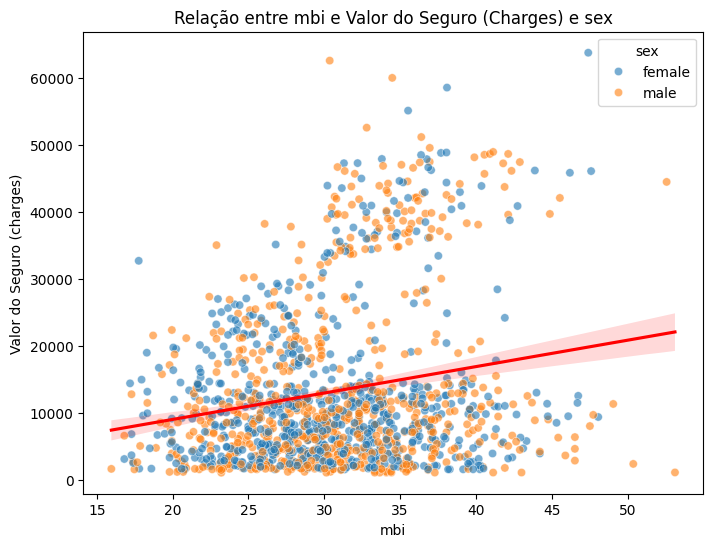

In [63]:
# Diagrama de dispersão entre idade e valor do seguro (charges)
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=Df3, alpha=0.6)

# Linha de tendência (opcional, ajuda a visualizar a correlação)
sns.regplot(x='bmi', y='charges', data=Df3, scatter=False, color='red')

plt.title('Relação entre mbi e Valor do Seguro (Charges) e sex')
plt.xlabel('mbi')
plt.ylabel('Valor do Seguro (charges)')
plt.show()


Pelo gráfico percebe-se que para as pessoas não fumantes a alteração no bmi não leva a mudanças no custo do seguro, mas para as fumantes sim.

Crie um novo conjunto de dados (X e y) apenas com as variáveis age, bmi e smoker, divida-o em dados de treinamento e teste (use os mesmos parâmetros da divisão feita anteriormente) e apresenta os conjuntos.

In [64]:

# Selecionando apenas as colunas desejadas
df_model = Df3[['age', 'bmi', 'smoker', 'charges']].copy()

# Criando X e y
X = df_model[['age', 'bmi', 'smoker']]
y = df_model['charges']

# Divisão treino e teste (mesmos parâmetros usados antes)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Exibindo os datasets resultantes
print("X_train:\n", X_train.head(), "\n")
print("X_test:\n", X_test.head(), "\n")
print("y_train:\n", y_train.head(), "\n")
print("y_test:\n", y_test.head(), "\n")


X_train:
       age    bmi  smoker
560    46  19.95       0
1285   47  24.32       0
1142   52  24.86       0
969    39  34.32       0
486    54  21.47       0 

X_test:
       age     bmi  smoker
764    45  25.175       0
887    36  30.020       0
890    64  26.885       1
1293   46  25.745       0
259    19  31.920       1 

y_train:
 560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64 

y_test:
 764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64 



Crie e treine o novo modelo com os três atributos. Apresente os coeficientes da reta e o r2 e compare-o com os modelos anteriores.

In [66]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [  259.41020462   326.45023215 23675.37184666]
b =  -11707.80233458317
Coeficiente de determinação:  0.7776932310583375
Erro quadrado médio:  34512843.880227886
